#### Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
- 1.	Id number: 1 to 214
- 2.	RI: refractive index
- 3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- 4.	Mg: Magnesium
- 5.	Al: Aluminum
- 6.	Si: Silicon
- 7.	K: Potassium
- 8.	Ca: Calcium
- 9.	Ba: Barium
- 10.	Fe: Iron
- 11.	Type of glass: (class attribute)
- 	1- building_windows_float_processed
- 	2- building_windows_non_float_processed
- 	3- vehicle_windows_float_processed
- 	4- vehicle_windows_non_float_processed (none in this database)
- 	5- containers
- 	6- tableware
- 	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass


In [1]:
#### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

#### Data Reading and Descriptive Analysis

In [2]:
data=pd.read_csv('glass.csv')

In [3]:
data.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [4]:
data.tail()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [6]:
data.shape

(213, 11)

In [7]:
new_column_name=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']

In [8]:
data.columns = new_column_name


In [9]:
# Check for missing values
print("\nChange Column Name:")
data


Change Column Name:


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [10]:
# Check for missing values
print("\nMissing value summary:")
print(data.isnull().sum())


Missing value summary:
Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64


In [11]:
# Count the occurrences of each glass type
glass_type_counts = data['Type of glass'].value_counts()
print("\nGlass type distribution:")
print(glass_type_counts)


Glass type distribution:
2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


In [12]:
# Display summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
        Id number          RI          Na          Mg          Al          Si  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean   108.000000    1.518353   13.406761    2.676056    1.446526   72.655023   
std     61.631972    0.003039    0.818371    1.440453    0.499882    0.774052   
min      2.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     55.000000    1.516520   12.900000    2.090000    1.190000   72.280000   
50%    108.000000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    161.000000    1.519150   13.830000    3.600000    1.630000   73.090000   
max    214.000000    1.533930   17.380000    3.980000    3.500000   75.410000   

                K          Ca          Ba          Fe  Type of glass  
count  213.000000  213.000000  213.000000  213.000000     213.000000  
mean     0.499108    8.957934    0.175869    0.057277       2.788732  
std      0.653035    1.426435    0.4

- All features exhibit relatively even distributions, except for "Ca," where outliers are 
evident due to a substantial difference between the 75th percentile (9.18) and the maximum value (16.19).

#### EDA

In [13]:
# Calculate and print skewness and kurtosis for all columns
print("Printing Skewness and Kurtosis for all columns")
print()

for col in data.columns:
    skewness = data[col].skew()
    kurtosis = data[col].kurt()
    
    print(f"- {col}: Skewness {skewness:.3f} and Kurtosis {kurtosis:.3f}")

Printing Skewness and Kurtosis for all columns

- Id number: Skewness 0.000 and Kurtosis -1.200
- RI: Skewness 1.640 and Kurtosis 4.977
- Na: Skewness 0.457 and Kurtosis 3.031
- Mg: Skewness -1.154 and Kurtosis -0.423
- Al: Skewness 0.900 and Kurtosis 2.047
- Si: Skewness -0.745 and Kurtosis 3.020
- K: Skewness 6.549 and Kurtosis 54.585
- Ca: Skewness 2.041 and Kurtosis 6.634
- Ba: Skewness 3.407 and Kurtosis 12.465
- Fe: Skewness 1.747 and Kurtosis 2.634
- Type of glass: Skewness 1.109 and Kurtosis -0.294


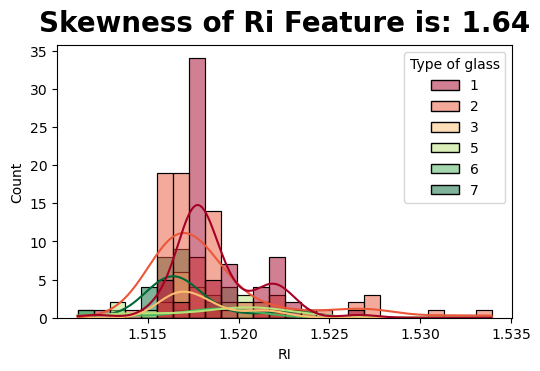

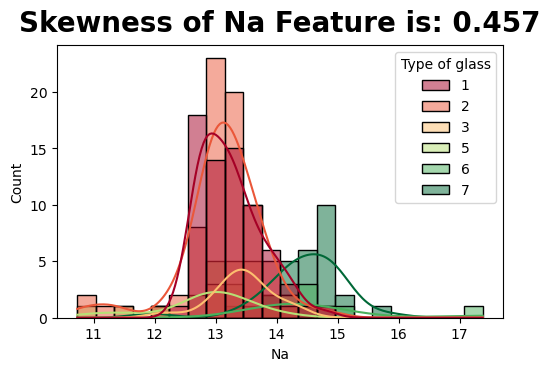

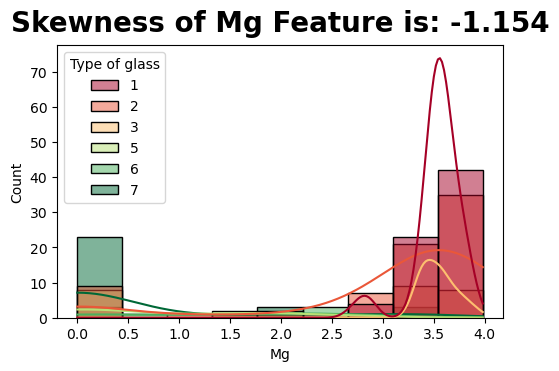

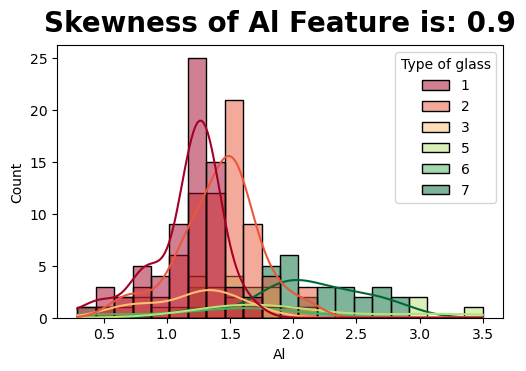

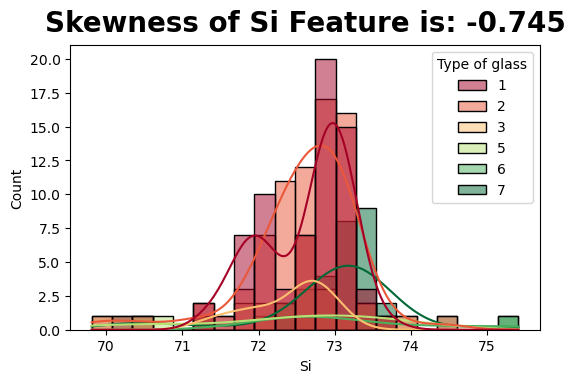

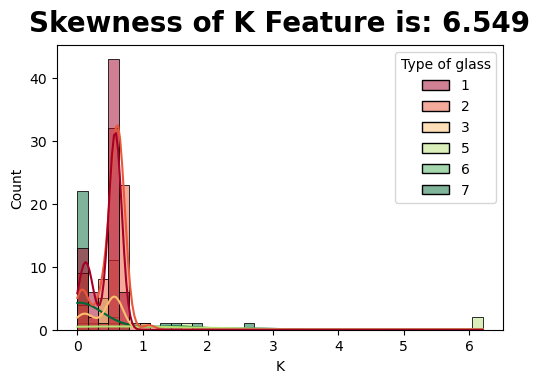

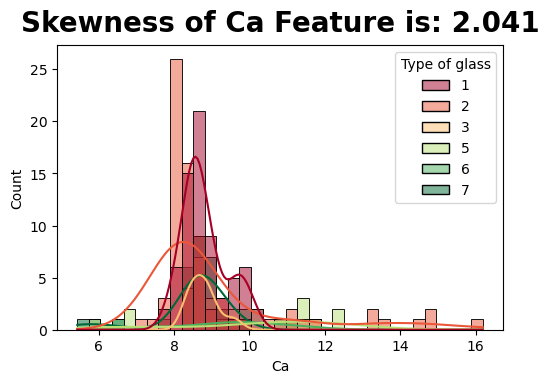

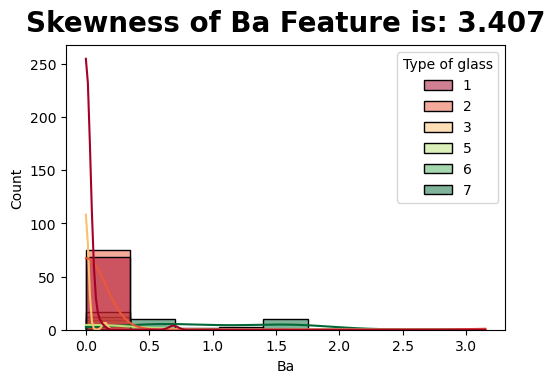

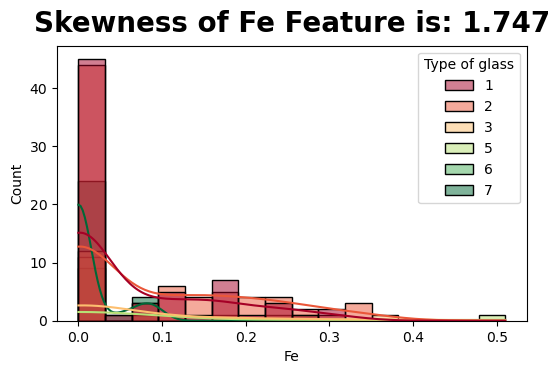

<Figure size 640x480 with 0 Axes>

In [14]:
# Visualizing the distribution of each numerical feature using histograms
numerical_features = data.select_dtypes(include=['float64'])
for i, column in enumerate(numerical_features.columns):
    
    plt.figure(figsize=(20, 10))
    plt.subplot(3, 4, i+1)
    sns.histplot(x=column,kde=True,hue="Type of glass",data=data, palette="RdYlGn")
    skew = numerical_features[column].skew()
    plt.title(f"Skewness of {column.title()} Feature is: {round(skew,3)}",fontweight="black",size=20,pad=10)
    plt.tight_layout()
    plt.show()
plt.tight_layout()
plt.show()

<Axes: xlabel='Type of glass', ylabel='count'>

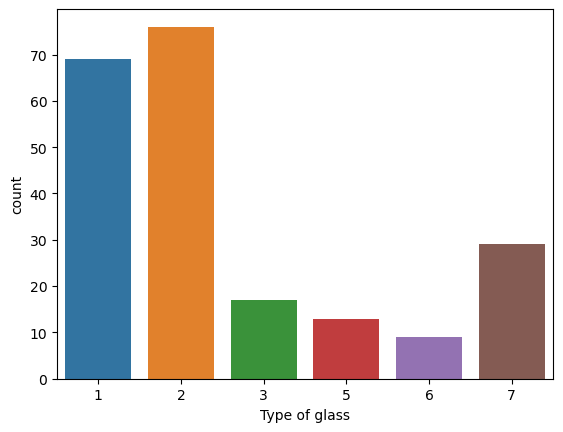

In [15]:
#Counting Number of Values Belonging to each class

data['Type of glass'].value_counts()



sns.countplot(x='Type of glass', data=data)


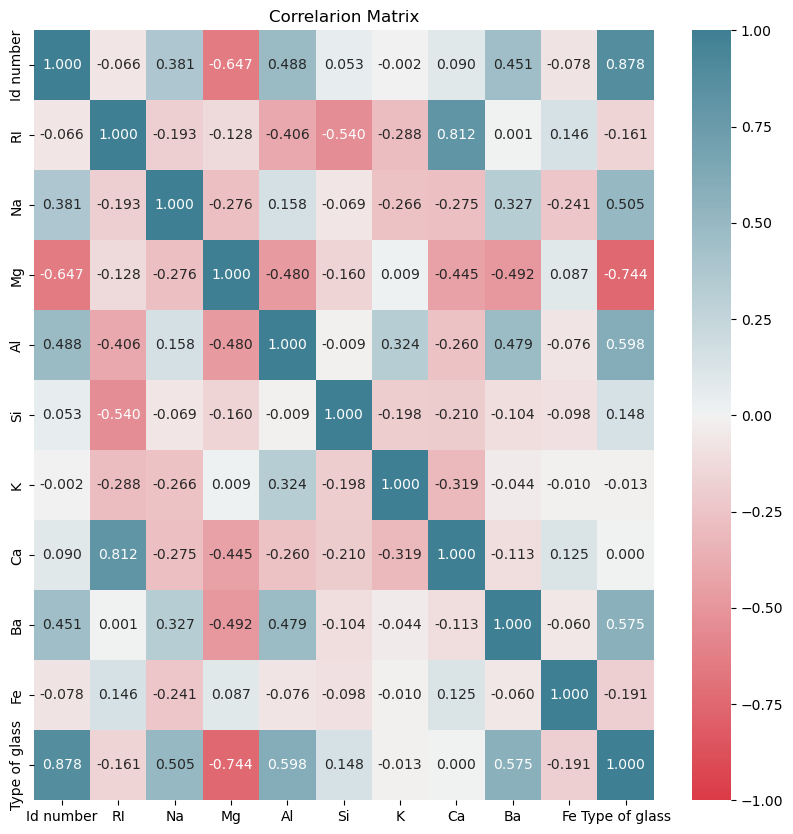

In [16]:
plt.figure(figsize=(10,10))

cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(data=data.corr(), vmin=-1.0, vmax=1.0, center=0,  linecolor='k', annot=True, fmt='.3f',cmap=cmap)
plt.title('Correlarion Matrix')
plt.show()

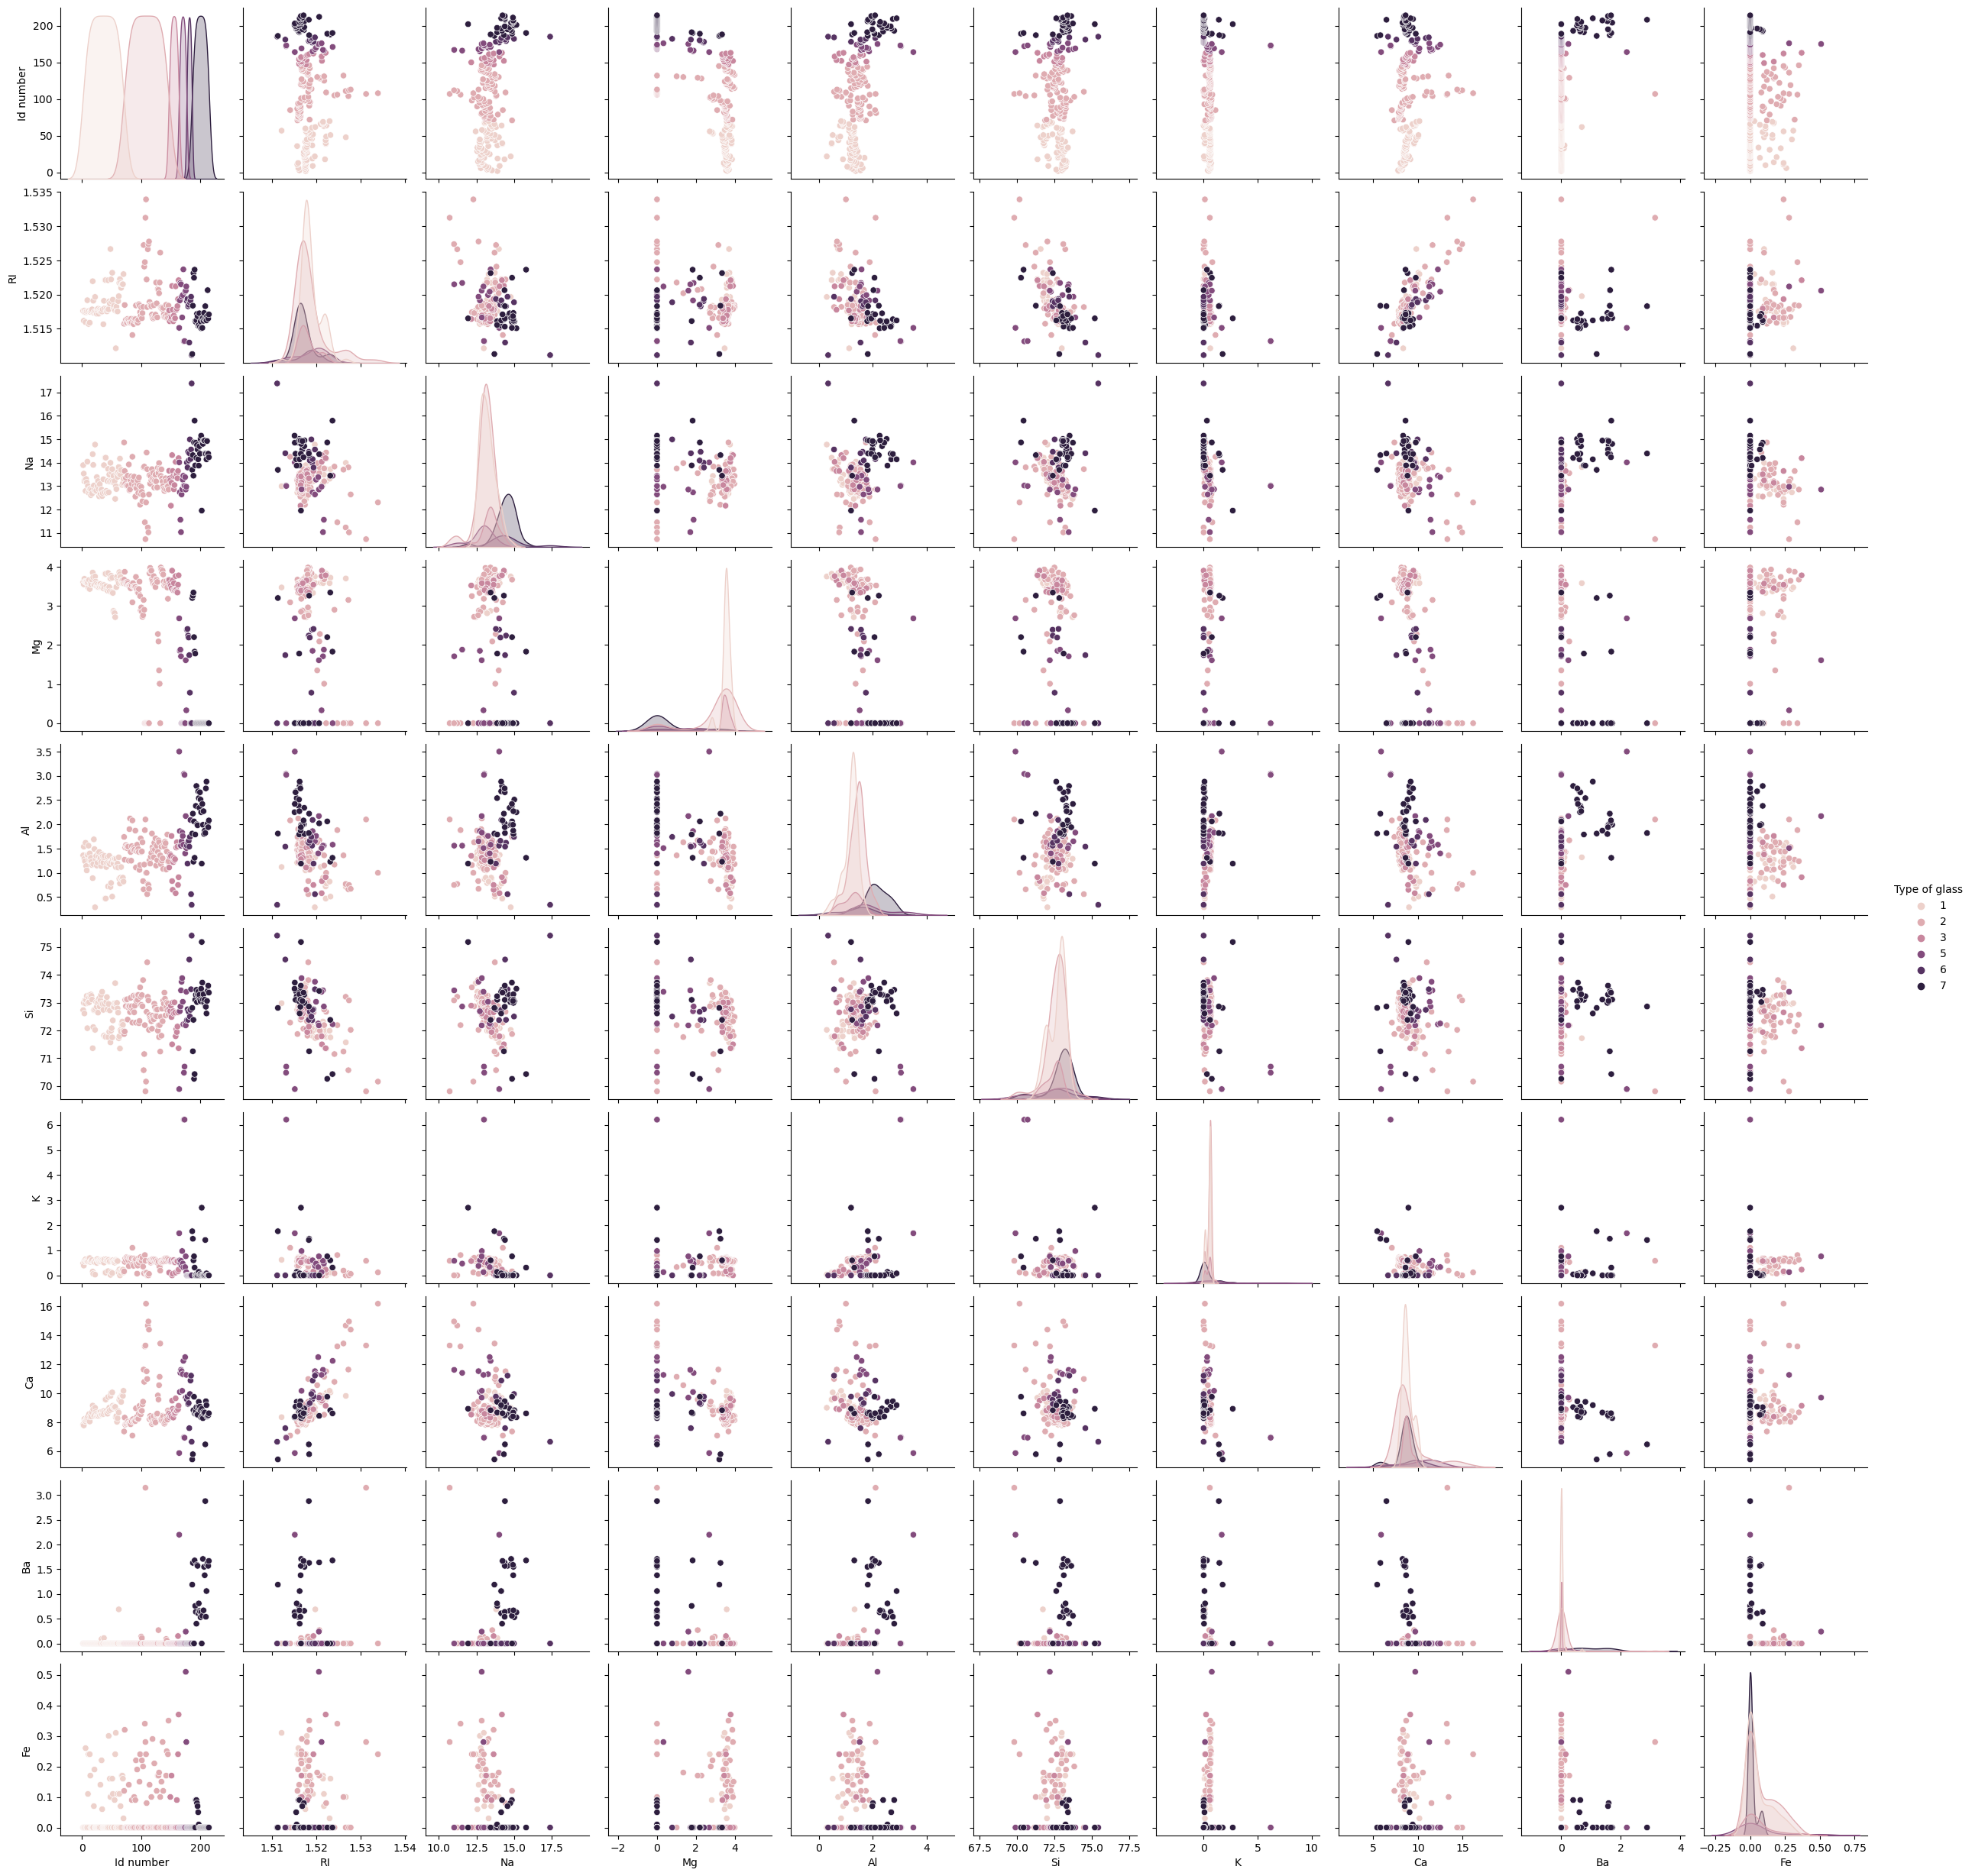

In [17]:
sns.pairplot(data,hue='Type of glass')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE


                      P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.01  1.66  0.68  0.65  0.21  0.1  0.01  0.0  0.0


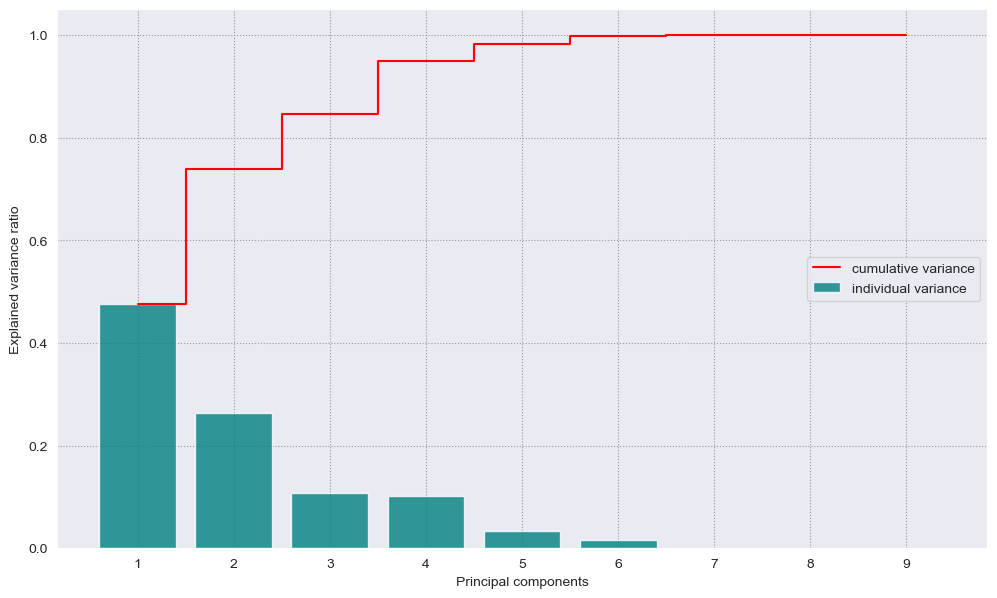

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming data is your DataFrame containing the data

# Selecting the columns for PCA
X_var = data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]

# Creating a PCA instance
pca = PCA(random_state=1)

# Fitting PCA on the selected data
pca.fit(X_var)

# Extracting explained variance ratios
var_exp = pca.explained_variance_ratio_

# Calculating cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

# Creating a DataFrame for explained variances of each component
var_ = pd.DataFrame(pca.explained_variance_.round(2),
                      index=["P" + str(i) for i in range(1, 10)],
                      columns=["Explained_Variance"])

# Printing the DataFrame
print(var_.T)

# Plotting explained variance ratios
plt.figure(figsize=(12, 7))
plt.bar(range(1, len(cum_var_exp) + 1), var_exp,
        align='center', label='individual variance', color='teal', alpha=0.8)
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp,
         where='mid', label='cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1, len(var_exp) + 1, 1))
plt.legend(loc='center right')
plt.show()


- The first 5 components account for about 99% of the total explained variance.  
  We can run the analysis again only with these five components.

In [20]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)

In [21]:
# Separating the response (y) and explanatory (x) variables
X = X_reduced
y = data["Type of glass"].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((149, 5), (64, 5), (149,), (64,))

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train,y_train)

DecisionTreeClassifier()

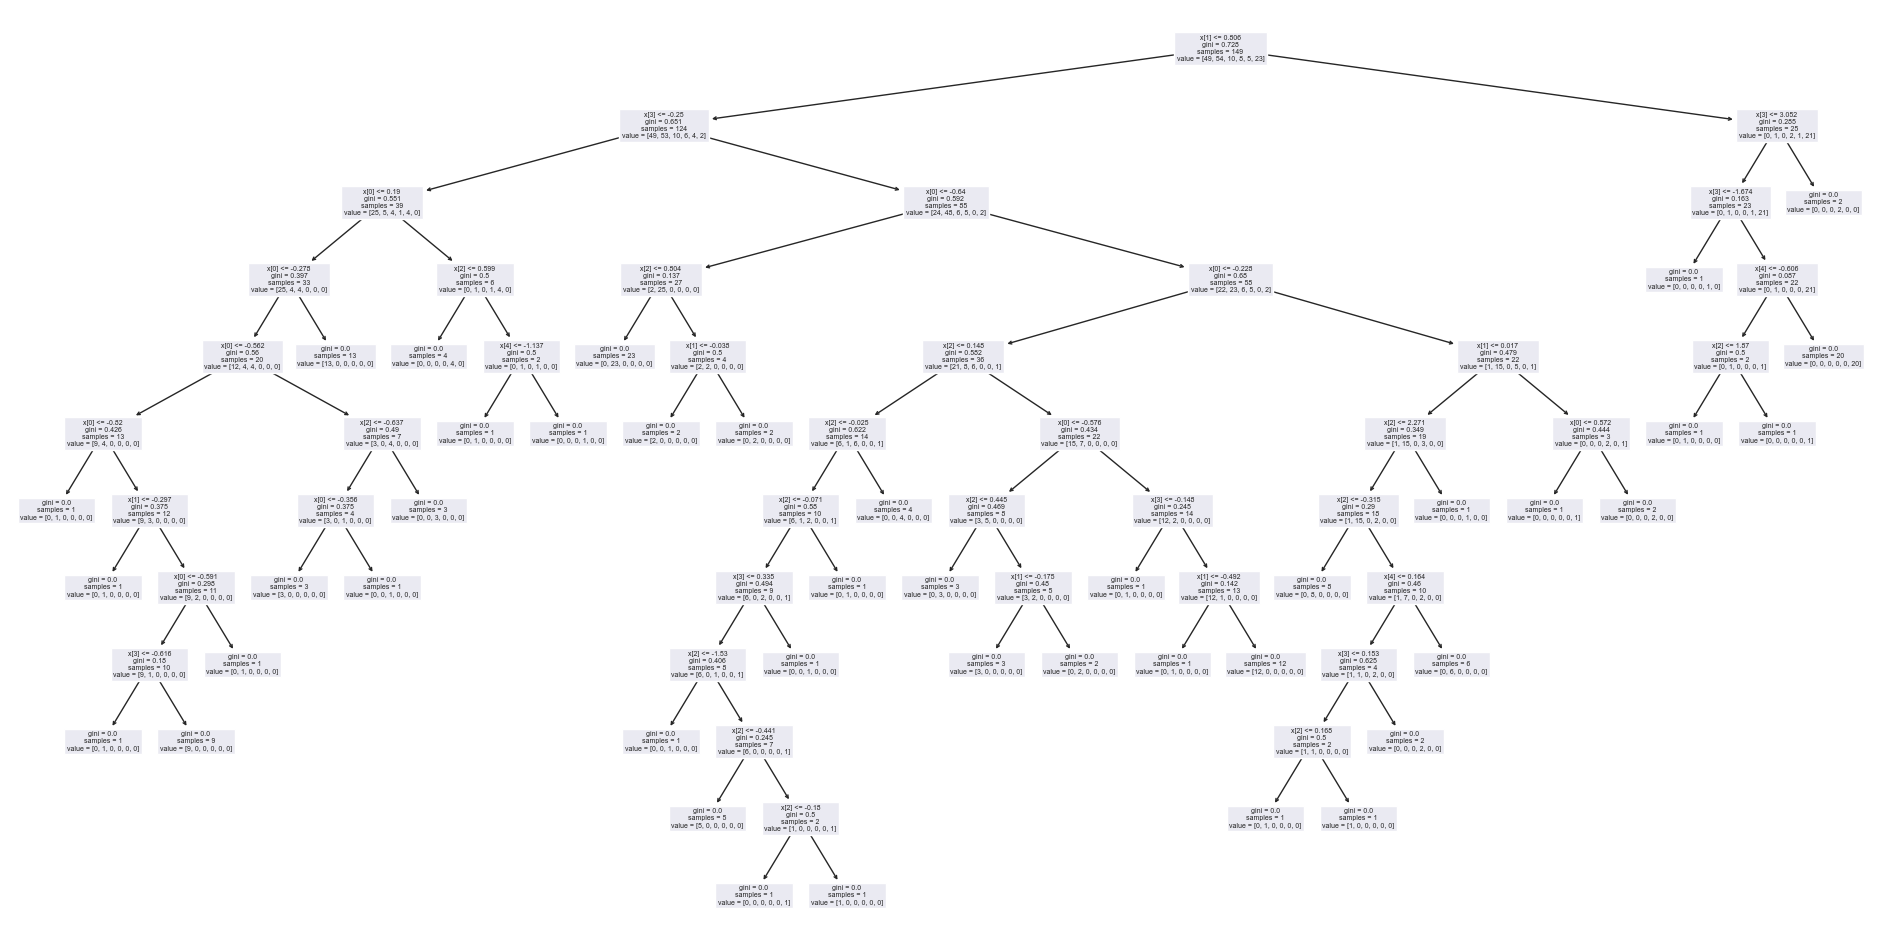

In [26]:
plt.figure(figsize=(24,12))

tree.plot_tree(Decision_Tree.fit(X_train, y_train))
plt.show()

In [27]:
predict = Decision_Tree.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       0.62      0.50      0.56        20
           2       0.52      0.59      0.55        22
           3       0.43      0.43      0.43         7
           5       1.00      0.80      0.89         5
           6       0.80      1.00      0.89         4
           7       0.86      1.00      0.92         6

    accuracy                           0.62        64
   macro avg       0.71      0.72      0.71        64
weighted avg       0.63      0.62      0.62        64



In [28]:
sc1 = metrics.accuracy_score(predict,y_test)

In [29]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)



In [31]:
# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

In [32]:
# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc5 = metrics.accuracy_score(y_pred,y_test)

In [34]:
print(Decision_Tree.feature_importances_)
print(RandFor.feature_importances_)

print(gbmMod.feature_importances_)

[0.29854278 0.28300236 0.19556733 0.18593623 0.03695129]
[0.34752155 0.3327779  0.04610598 0.19195803 0.08163654]
[0.36752153 0.29532424 0.10782933 0.16797554 0.06134937]


In [35]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc2],['Gradient Boost',sc4],
                             ['Decision Tree',sc1],['Random Forest',sc5]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.671875
1,Gradient Boost,0.687500
2,Decision Tree,0.625000
3,Random Forest,0.625000


In [37]:
# Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
}

# Create GridSearchCV object with the classifier, parameter grid, and cross-validation
grid_search = GridSearchCV(estimator=gbmMod, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the data
grid_search.fit(X, y)

# Print the best parameters and the corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Accuracy: 0.6009389671361501


In [39]:
model = grid_search.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.640625

Text(279.72222222222223, 0.5, 'predicted label')

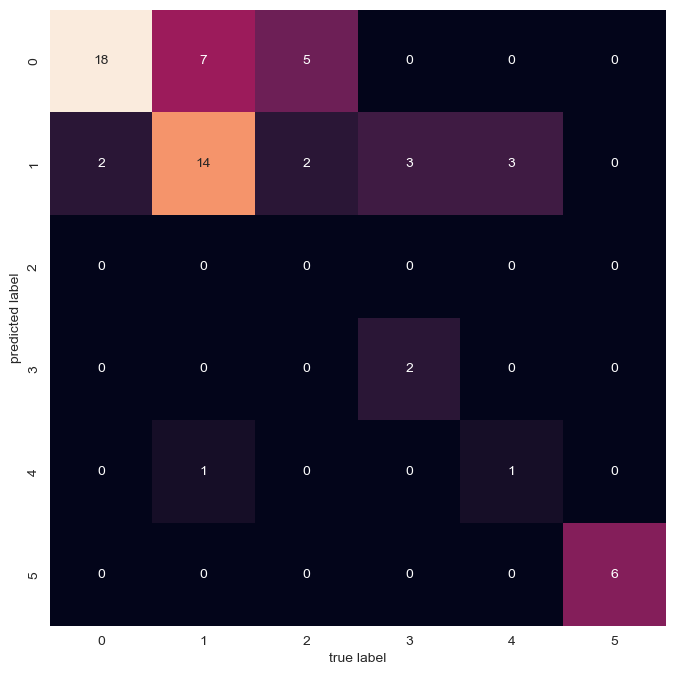

In [40]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### The End